# CI/CD Pipeline for ML Projects

- The goal is to automate the process from **data preparation → model training → evaluation → deployment.**
- **CI (Continuous Integration):** Every time code changes, it is automatically tested, validated, and merged.
- **CD (Continuous Delivery/Deployment):** New versions of the model/code are automatically delivered or deployed to production.

**1.Tools we use:**

- **Git + GitHub →** Version control & code hosting.
- **GitHub Actions (CI/CD) →** Automates testing, training, and deployment.
- **Docker / Cloud (AWS, Azure, GCP) →** For real deployments (optional in this demo).

**2. Workflow Steps:**

1.Data extraction & cleaning.\
2.Train/Test split (X_train, y_train, X_test, y_test).\
3.Build models (Logistic Regression, Random Forest).\
4.Evaluate (confusion matrix, f1, precision, recall, accuracy).\
5.Save outputs (plots + metrics + pickle file).\
6.Push code & files to GitHub.\
7.Create a GitHub Actions Workflow (.github/workflows/run.yml).\
8.CI/CD auto-runs pipeline on every push.

# **Model Training**

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, f1_score, recall_score
import pickle

In [8]:
sns.set(style='white')

# Load Data from a public URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
dataset = pd.read_csv(url, header=None, names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])

# Feature names (Ensure no extra spaces or parentheses)
features_names = dataset.columns.tolist()[:-1] # Exclude the 'class' column

In [10]:
# Feature Engineering
dataset['sepal_length_width_ratio'] = dataset['sepal_length'] / dataset['sepal_width']
dataset['petal_length_width_ratio'] = dataset['petal_length'] / dataset['petal_width']

# Select Features and Target
dataset = dataset[['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
                   'sepal_length_width_ratio', 'petal_length_width_ratio', 'class']]

In [15]:
# Split Data
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=44)
X_train = train_data.drop('class', axis=1).values.astype('float32')
y_train = train_data.loc[:, 'class'].values.astype('int32')
X_test = test_data.drop('class', axis=1).values.astype('float32')
y_test = test_data.loc[:, 'class'].values.astype('int32')

In [13]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
le = LabelEncoder()
dataset['class'] = le.fit_transform(dataset['class'])

# Display the updated dataset with encoded 'class'
display(dataset.head())

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_width_ratio,petal_length_width_ratio,class
0,5.1,3.5,1.4,0.2,1.457143,7.0,0
1,4.9,3.0,1.4,0.2,1.633333,7.0,0
2,4.7,3.2,1.3,0.2,1.468750,6.5,0
3,4.6,3.1,1.5,0.2,1.483871,7.5,0
4,5.0,3.6,1.4,0.2,1.388889,7.0,0


In [16]:
# Logistic Regression
logreg = LogisticRegression(C=0.0001, solver='lbfgs', max_iter=100, multi_class='multinomial')
logreg.fit(X_train, y_train)
predictions_lr = logreg.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [17]:
cm_lr = confusion_matrix(y_test, predictions_lr)
f1_lr = f1_score(y_test, predictions_lr, average='micro')
prec_lr = precision_score(y_test, predictions_lr, average='micro')
recall_lr = recall_score(y_test, predictions_lr, average='micro')

In [18]:
train_acc_lr = logreg.score(X_train, y_train) * 100
test_acc_lr = logreg.score(X_test, y_test)

In [19]:
# Random Forest
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
predictions_rf = rf_reg.predict(X_test)
predictions_rf_class = np.round(predictions_rf).astype(int)

In [20]:
f1_rf = f1_score(y_test, predictions_rf_class, average='micro')
prec_rf = precision_score(y_test, predictions_rf_class, average='micro')
recall_rf = recall_score(y_test, predictions_rf_class, average='micro')

In [21]:
train_acc_rf = rf_reg.score(X_train, y_train) * 100
test_acc_rf = rf_reg.score(X_test, y_test) * 100

In [22]:
# Save Model
with open("model.pkl", "wb") as f:
    pickle.dump(rf_reg, f)

In [23]:
# Save Scores
with open("scores.txt", "w") as score:
    score.write(f"Random Forest Train Accuracy: {train_acc_rf:.2f}%\n")
    score.write(f"Random Forest Test Accuracy: {test_acc_rf:.2f}%\n")
    score.write(f"F1 Score: {f1_rf:.2f}\n")
    score.write(f"Recall Score: {recall_rf:.2f}\n")
    score.write(f"Precision Score: {prec_rf:.2f}\n")

# GitHub Setup for CI/CD

1.Create new repo → cicd_pipeline\
2.Upload files:
  - iris.csv
  - train.py (the model training code above)
  - requirements.txt

- requirements.txt example:

     pandas\
     numpy\
     scikit-learn\
     matplotlib\
     seaborn\
3.Inside repo, create folder: .github/workflows/
4.Add file run.yml:
- name: Set up Python
  uses: actions/setup-python@v4
  with:
    python-version: '3.10'

- name: Install dependencies
  run: |
    pip install -r requirements.txt
- name: Run training script
  run: |
    python train.py
5.Commit & Push → **Go to Actions tab → See pipeline running.**


## We successfully:

- Trained ML models (Logistic Regression & Random Forest).
- Saved metrics and model artifacts.
- Set up GitHub Actions CI/CD workflow.
- Automated model training on each push.


# Repository Setup

**Step 1: Repository Setup**

We created a new GitHub repository **CICD_pipeline** and uploaded the required files.

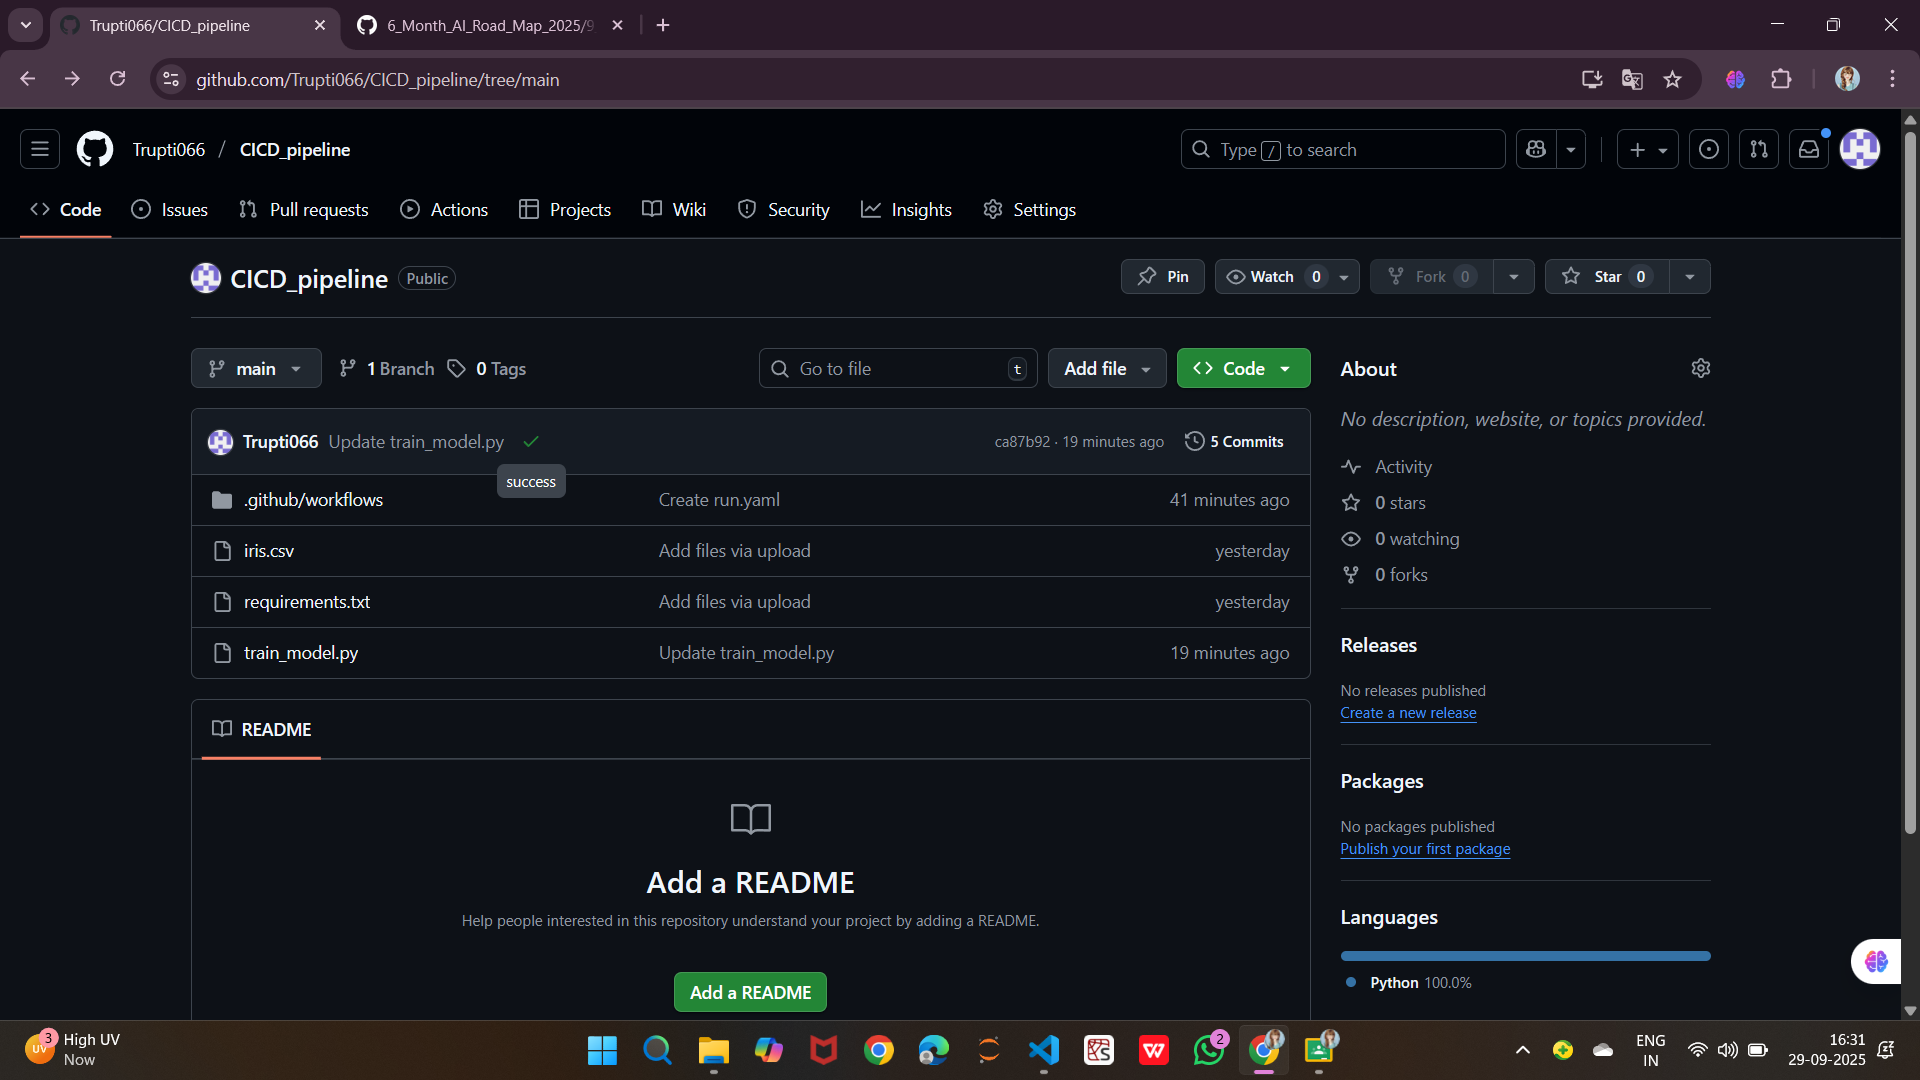

Here we can see:

- iris.csv → Dataset
- train_model.py → Model training script
- requirements.txt → Dependencies
- .github/workflows/run.yaml → Workflow definition

# Repository Setup

**Step 2: GitHub Actions Workflow**

GitHub Actions automatically triggered the workflow whenever changes were pushed

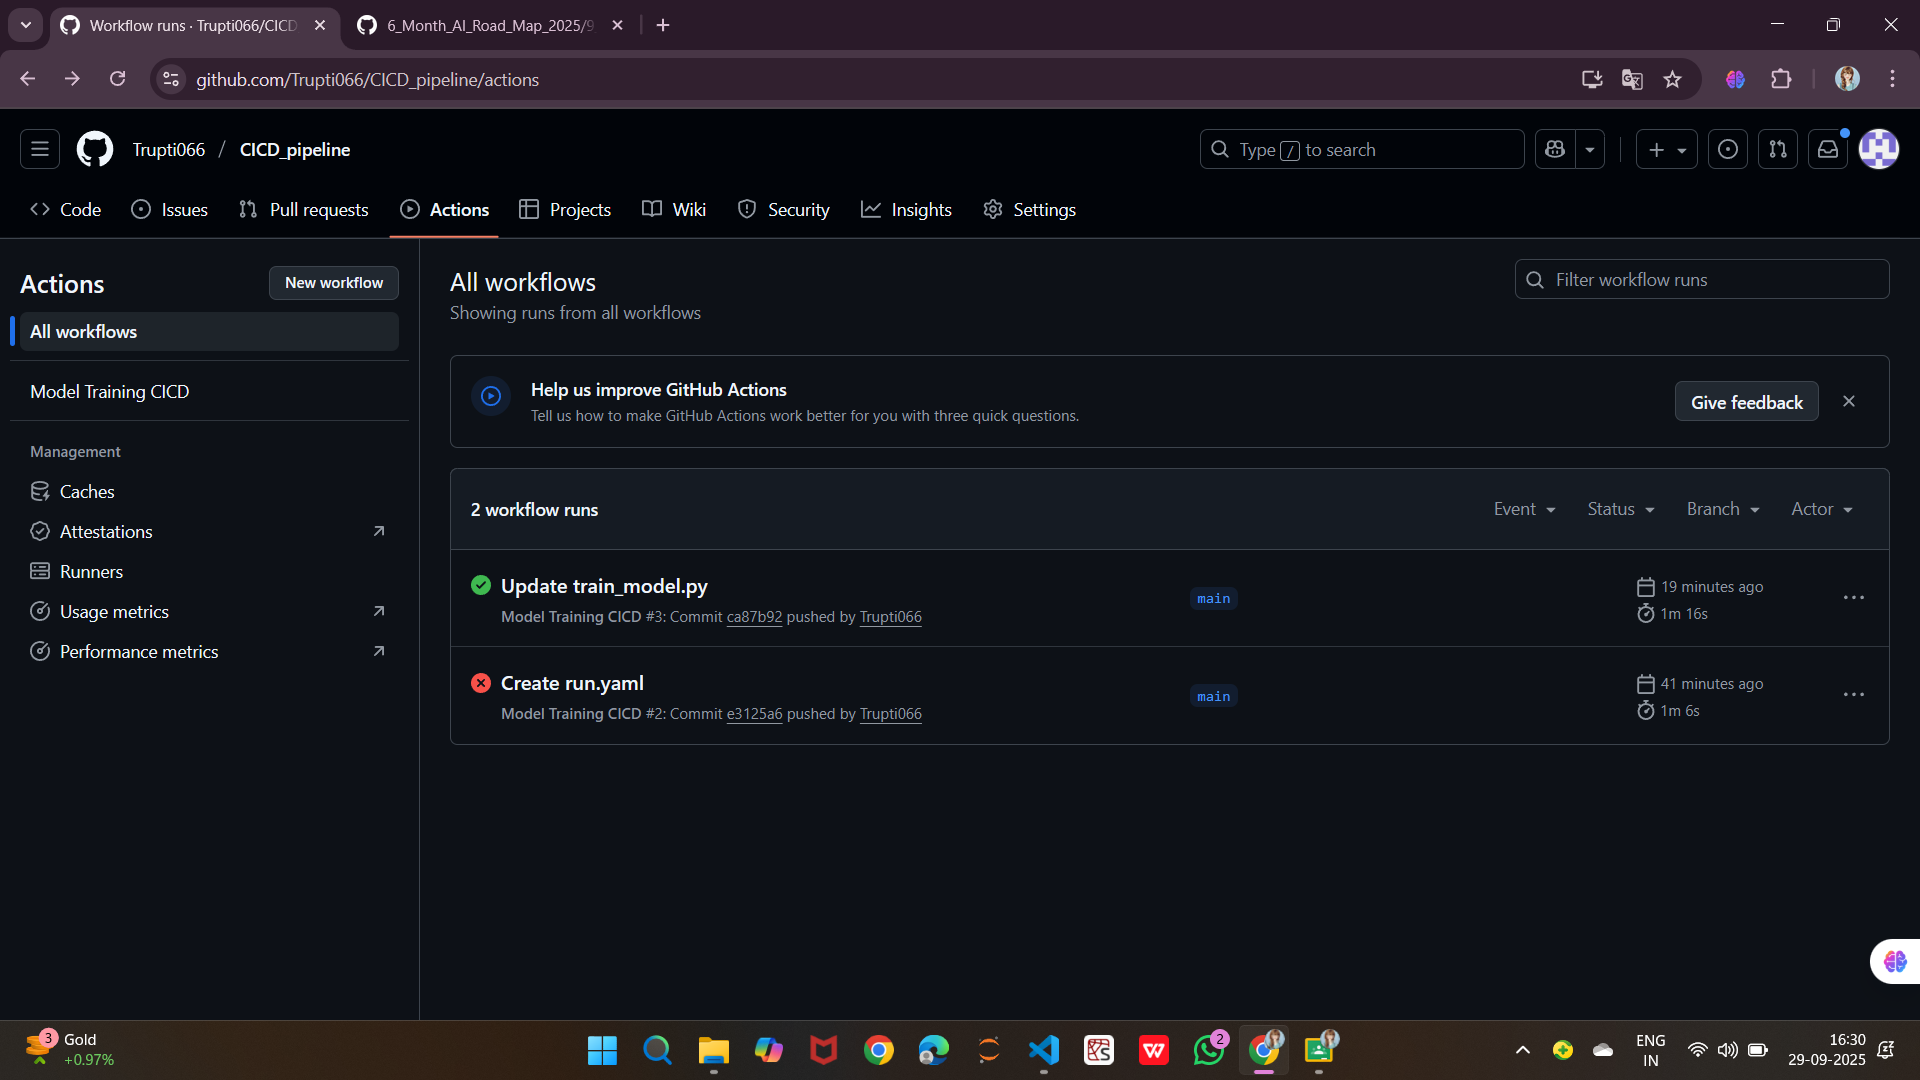

- The first workflow (Create run.yaml) failed because of a setup issue.
- After fixing, the second workflow (Update train_model.py) passed successfully.

# Train Model

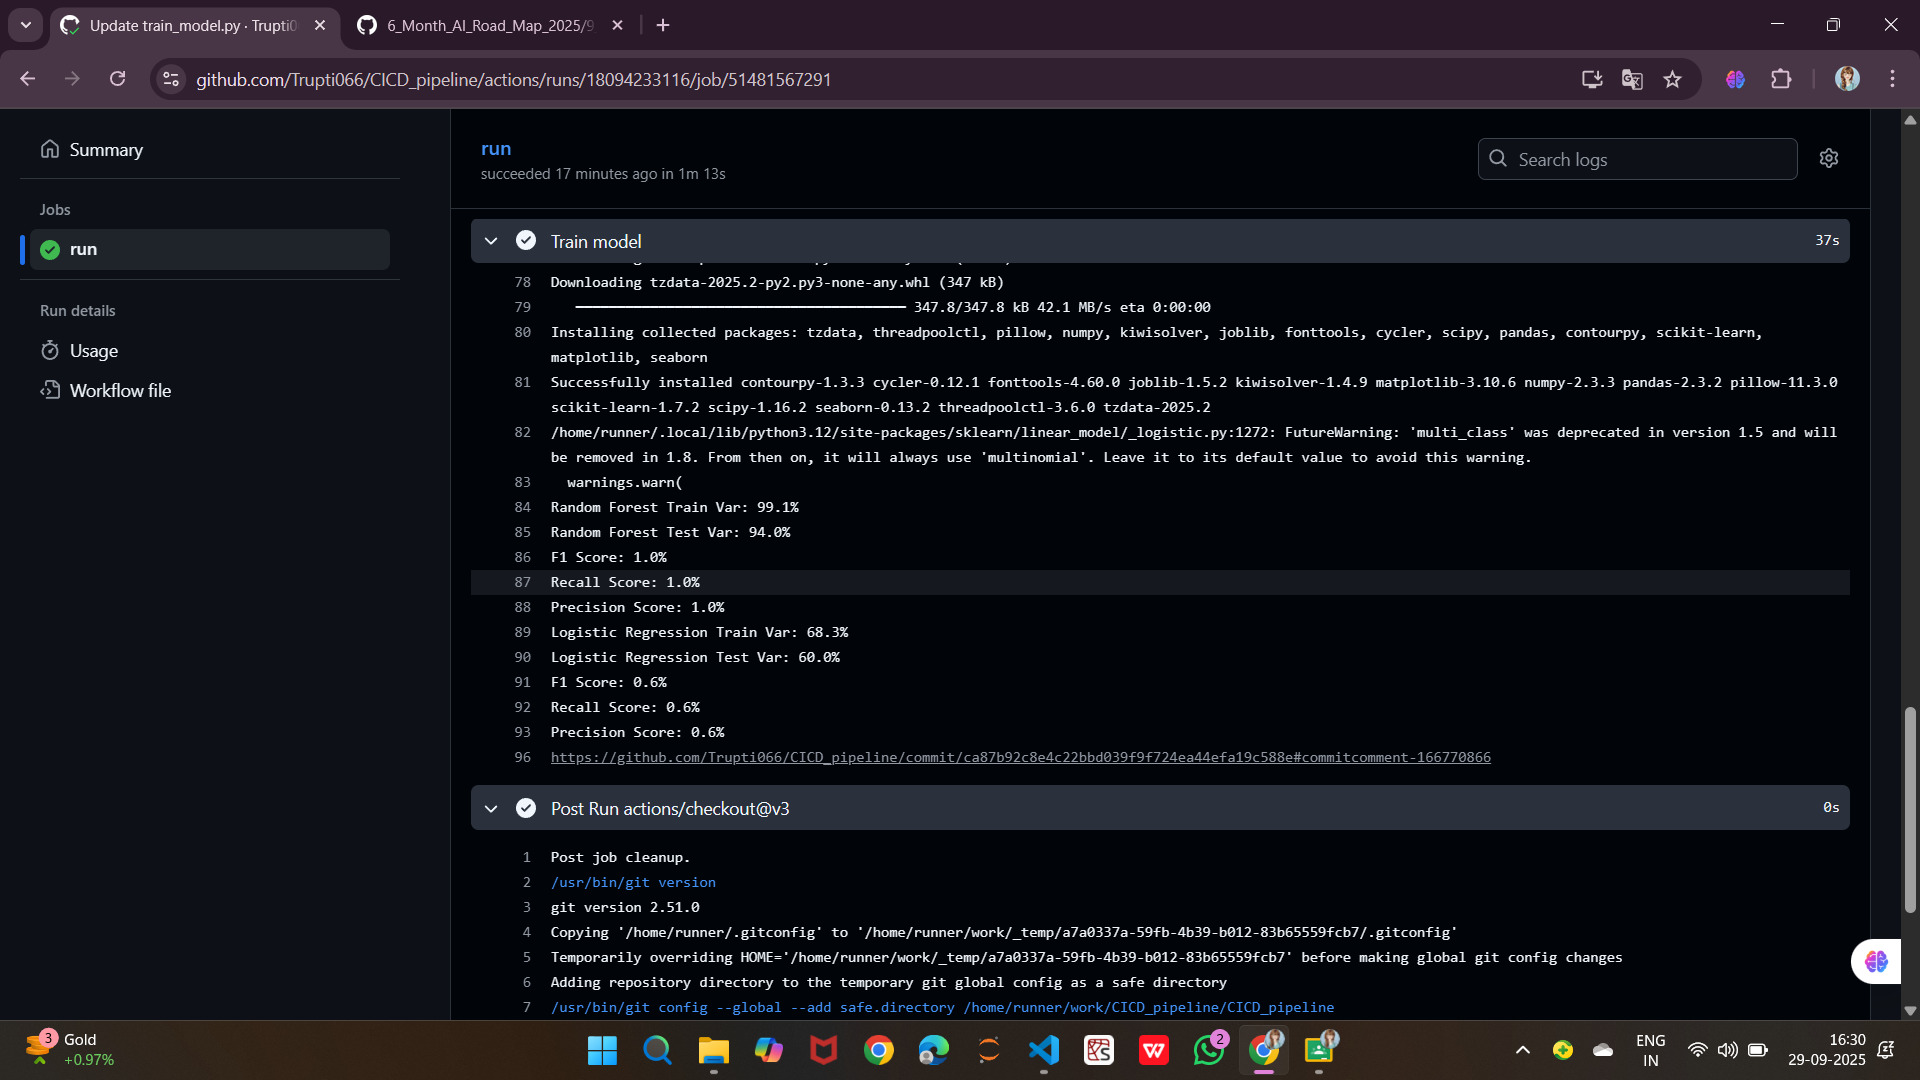

# Pipeline Capturing Code Changes

**Step 3: Pipeline Capturing Code Changes.**

The pipeline also captures even **small code changes.**

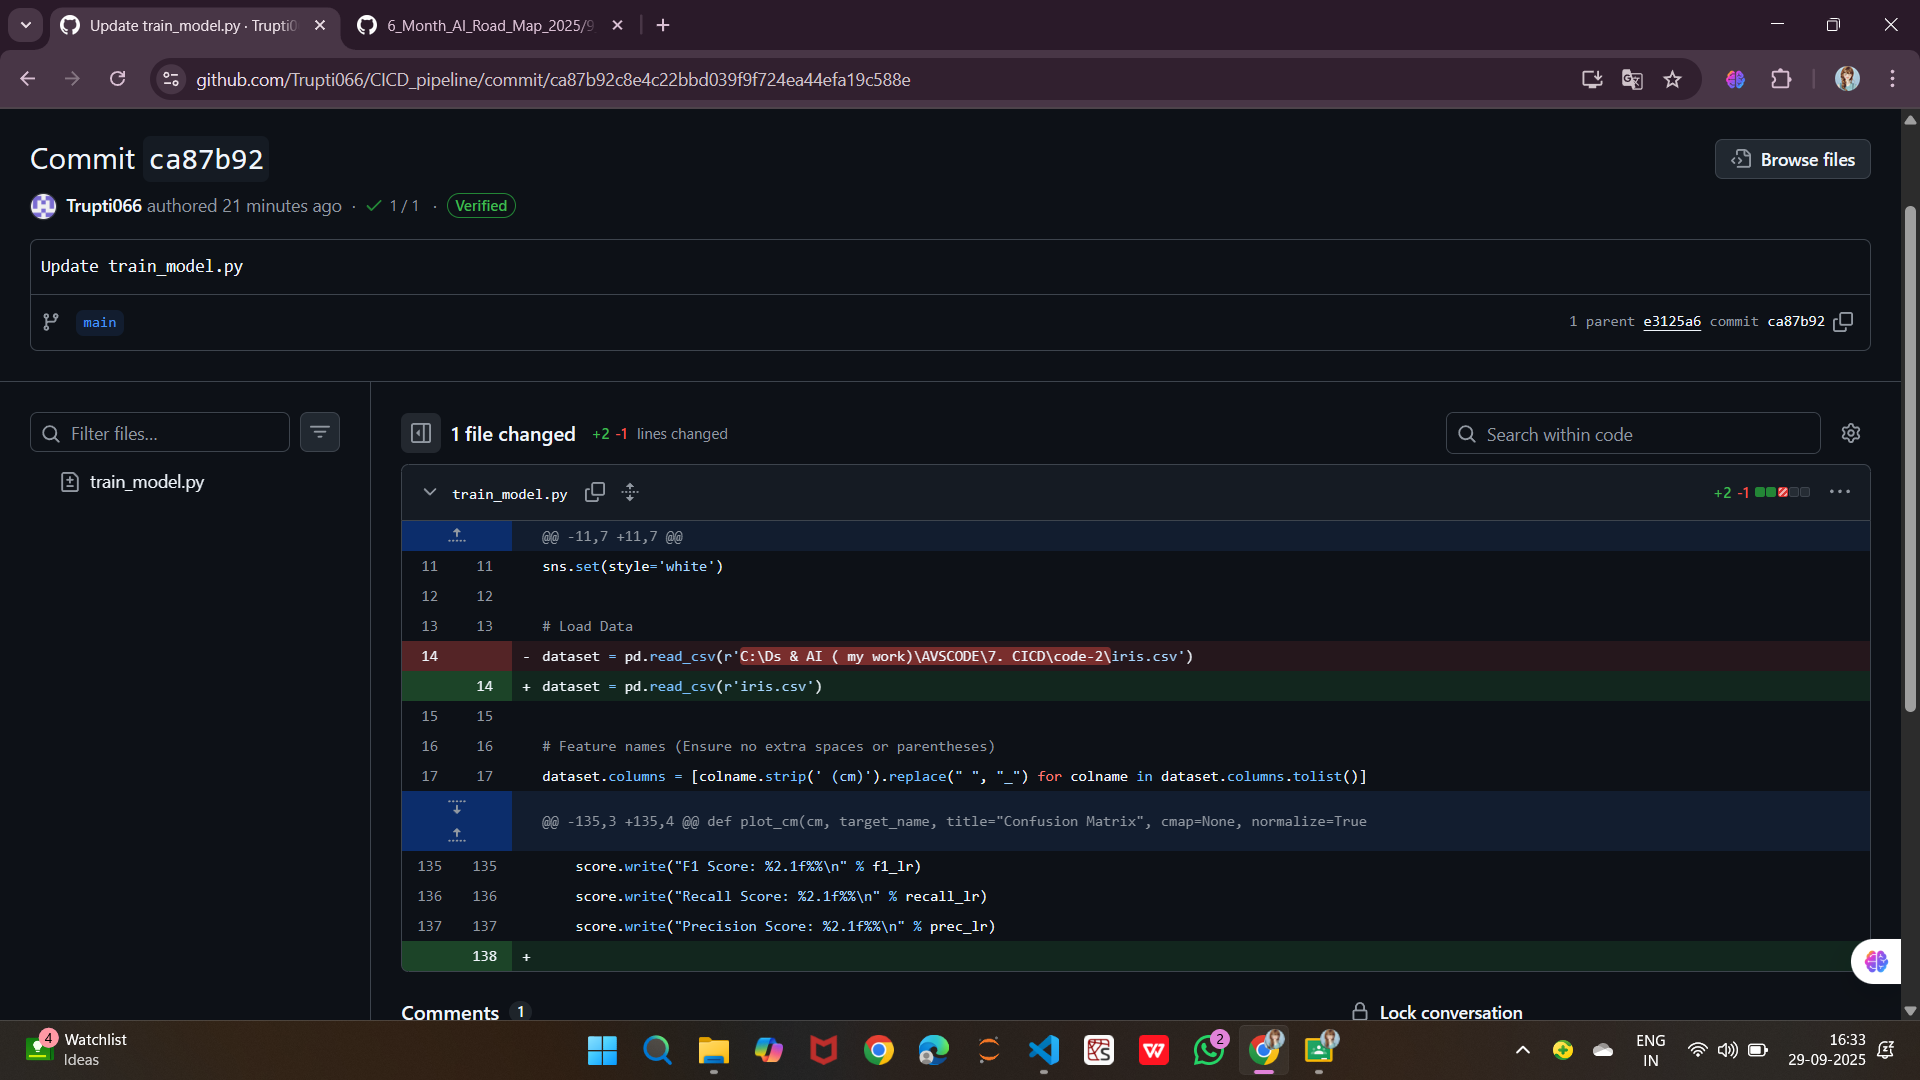


Here we see that:\

- 1 file was changed
- +2 lines added, -1 line removed
- GitHub Actions re-ran the pipeline automatically.